## 1.1

### 1.1.1

In [97]:
def qz(x, y):
    return (x + 3 * y) / (x**2 + y**2 + 1)


def qsumz(z):
    return sum(z)


def exchange_scheme(old_x, old_y, sorted_ids):
    x = [0] * 4
    y = [0] * 4

    x[0] = old_x[sorted_ids[0]]
    x[1] = old_x[sorted_ids[1]]
    x[2] = old_x[sorted_ids[2]]
    x[3] = old_x[sorted_ids[2]]

    y[0] = old_y[sorted_ids[2]]
    y[1] = old_y[sorted_ids[2]]
    y[2] = old_y[sorted_ids[0]]
    y[3] = old_y[sorted_ids[1]]

    return x, y


def get_sorted_ids(z):
    return sorted(range(len(z)), key=z.__getitem__)


def evo_step(x, y, z):
    min_id = min(range(len(z)), key=z.__getitem__)
    x = x[:]
    y = y[:]
    z = z[:]

    del x[min_id]
    del y[min_id]
    del z[min_id]

    return x, y, z


def evo_steps(x, y):
    results = []

    for _ in range(4):
        z = [qz(xi, y[i]) for i, xi in enumerate(x)]
        x, y, z = evo_step(x, y, z)
        x, y = exchange_scheme(x, y, get_sorted_ids(z))
        results.append([x, y, qsumz(z), z])

    return x, y, results

In [98]:
X = [-5, -3, -2, -1]
Y = [-1, -2, 0, 1]

In [99]:
results = evo_steps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

max_1_step: -0.029629629629629672
max_2_step: -0.40740740740740744
max_3_step: 0.7592592592592592
max_4_step: 1.5


In [100]:
print(f'max Z: {max(qualityArrZ)}')

max Z: 0.6666666666666666


## 1.2

### 1.2.1

In [101]:
import networkx as nx
from math import e

In [102]:
distances = [(1, 2, 22), (1, 3, 43), (1, 4, 39),
             (1, 5, 28), (1, 6, 20), (2, 3, 26),
             (2, 4, 33), (2, 5, 36), (2, 6, 17),
             (3, 4, 22), (3, 5, 40), (3, 6, 24),
             (4, 5, 22), (4, 6, 19), (5, 6, 20)]

V = [1, 3, 4, 5, 6, 2, 1]

Z = [(2, 4), (4, 6),
     (3, 5), (5, 2)]

P = [51, 23, 29, 31]

T = 100

In [103]:
def probability(delta, T):
    return 100 * e ** (-delta / T)


def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

In [ ]:
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1 for item in distances)
    else:
        return max(item[2] if (item[0] == i and item[1] == j) else -1 for item in distances)


def routeLength(V, distances):
    return sum(edgeLength(V[i], V[i + 1], distances) for i in range(len(V) - 1))


def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV


def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V


def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if deltaS > 0:
            if probability(deltaS, T) > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T)
    return V, arrSum


def drawRouteGraph(distances, bestRoute):
    newDistances = [
        distance for i in range(len(bestRoute) - 1) for distance in distances
        if (distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1]) or
           (distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1])
    ]

    graph = nx.Graph() 
    graph.add_weighted_edges_from(newDistances)

    nx.draw_kamada_kawai(graph, node_color='#78DBE2', node_size=2000, with_labels=True)


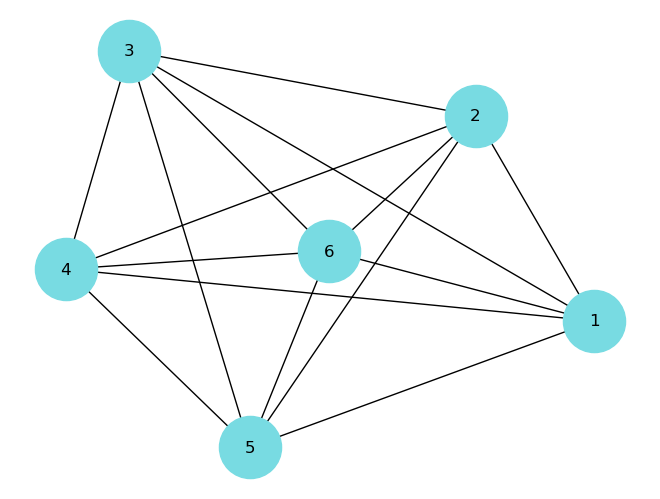

In [105]:
graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_color = '#78DBE2', node_size = 2000, with_labels = True)

In [106]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

In [107]:
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

Лучший выбранный маршрут: [1, 5, 6, 2, 4, 3, 1]
Длина лучшего выбранного маршрута: 163
Длины всех рассмотренных маршрутов: [146, 135, 167, 163, 194]


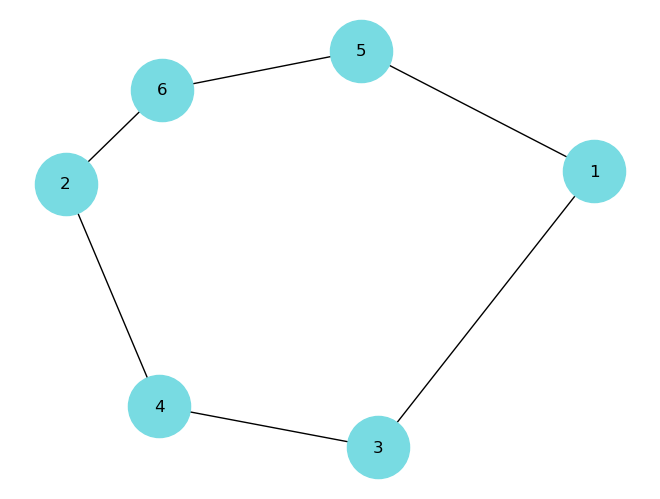

In [108]:
drawRouteGraph(distances, bestRoute)